In [1]:
import random
import numpy as np
from math import sqrt, pi

# Monte-Carlo method
---

In [2]:
def monte_carlo_integral(f, x1, x2, y1, y2, samples):
    
    # perform random tests
    counter = 0
    for i in range(samples):
        x = random.uniform(x1, x2)
        y = random.uniform(y1, y2)
        
        if 0 < y < f(x):
            counter += 1
        if f(x) < y < 0:
            counter -= 1
    
    # calculate integral
    result = (x2-x1) * (y2-y1) * (counter / samples)
    if y1 > 0:
        result += y1 * (x2-x1)
    if y2 < 0:
        result += y2 * (x2-x1)
    
    return result

In [3]:
def monte_carlo_volume(f, x1, x2, y1, y2, z1, z2, samples):
    
    # perform random tests
    counter = 0
    for i in range(samples):
        x = random.uniform(x1, x2)
        y = random.uniform(y1, y2)
        z = random.uniform(z1, z2)
        
        if f(x,y,z):
            counter += 1
            
    # calculate volume
    return (x2-x1) * (y2-y1) * (z2-z1) * (counter / samples)

## Integrals
---

$$ \int_{1}^{2}{\frac{1}{x^2}dx} = \frac{1}{2} $$  

$$ \int_{1}^{6}{\frac{1}{\sqrt{x^5+8}}dx} \approx 0.43506 $$  

$$ \int_{1}^{22}{\frac{1}{\sqrt{x+8}}dx} = 2\sqrt{30}-6 $$  

$$ \int_{1}^{22}{(x^2+2x)dx} = 4032$$  

$$ \int_{1}^{3}{\sqrt{x^5}dx} = \frac{54}{7}\sqrt{3} - \frac{2}{7}$$

In [4]:
integrals = [
    (lambda x: 1 / x**2,           1, 2 , 1/4, 1   ),
    (lambda x: 1 / sqrt(x**5 + 8), 1, 6 , 0,   1/3 ),
    (lambda x: 1 / sqrt(x + 8),    1, 22, 0,   1/3 ),
    (lambda x: x**2 + 2*x,         1, 22, 3,   528 ),
    (lambda x: sqrt(x**5),         1, 3,  1,   16  )
]

In [5]:
integrals_expected = [
    1/2,
    0.43506,
    2*sqrt(30) - 6,
    4032,
    54/7 * sqrt(3) - 2/7
]

## Volumes
---
#### Sphere (r = 5)
$$ V_1 = \frac{4}{3} \pi r^3 = \frac{500}{3}\pi \approx 523.598 $$
#### Cone (r = 10, h = 10)
$$ V_2 = \frac{1}{3} \pi r^2 h = \frac{1000}{3}\pi \approx 1047.197 $$
#### Cylinder (r = 3, h = 6) substracted from sphere (R = 10)
$$ V_3 = \frac{4}{3} \pi R^3 - \pi r^2 h = \frac{3838}{3}\pi \approx 4019.144 $$

In [6]:
def v1(x, y, z):
    return x**2 + y**2 + z**2 <= 5**2

def v2(x, y, z):
    return (x**2 + y**2 <= 10**2) and (0 <= z <= 10 - sqrt(x**2 + y**2))

def v3(x, y, z):
    return (x**2 + y**2 + z**2 <= 10**2) and not ((x**2 + y**2 <= 3**2) and abs(z) <= 6/2)

In [7]:
volumes = [
    (v1,  -5,  5,  -5,  5,  -5,  5),
    (v2, -10, 10, -10, 10,   0, 10),
    (v3, -10, 10, -10, 10, -10, 10)
]

In [8]:
volumes_expected = [
    500 / 3 * pi,
    1000 / 3 * pi,
    3838 / 3 * pi
]

## Manual tests
---

In [9]:
monte_carlo_integral(*integrals[0], 1000) - integrals_expected[0]

0.009499999999999953

In [10]:
monte_carlo_integral(*integrals[1], 1000) - integrals_expected[1]

0.028273333333333317

In [11]:
monte_carlo_integral(*integrals[2], 10000) - integrals_expected[2]

-0.01175115010332295

In [12]:
monte_carlo_integral(*integrals[3], 100000) - integrals_expected[3]

-4.299750000000131

In [13]:
monte_carlo_integral(*integrals[4], 1000) - integrals_expected[4]

-0.035820515531337804

In [14]:
monte_carlo_volume(*volumes[0], 10000) - volumes_expected[0]

-5.498775598298835

In [15]:
monte_carlo_volume(*volumes[1], 10000) - volumes_expected[1]

28.00244880340233

In [16]:
monte_carlo_volume(*volumes[2], 10000) - volumes_expected[2]

37.65579850745826

## Automatic tests
---
Each test is performed for sampling sizes of [100,200,300,400,500,600,700,800,900,1000]  
Result for each sample test is a average relative error rate from 100 tests

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

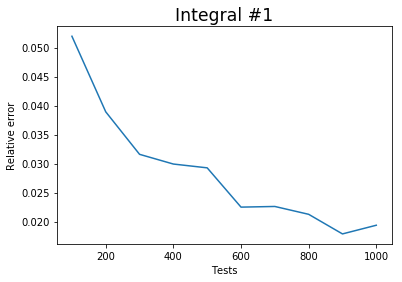

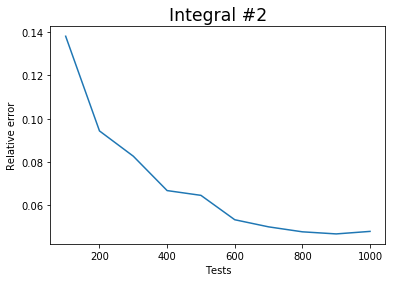

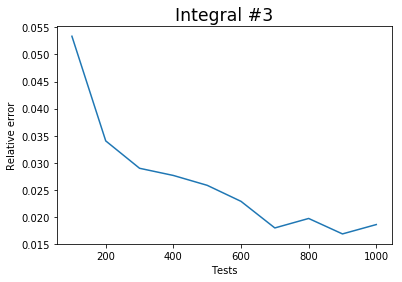

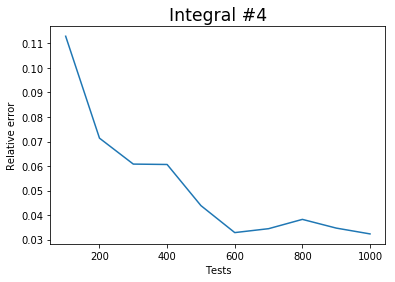

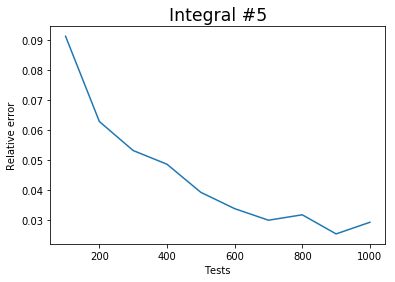

In [18]:
samples = list(range(100, 1100, 100))

for i in range(len(integrals)):
    plt.figure()
    plt.title(f'Integral #{i+1}', size='xx-large')
    plt.ylabel('Relative error')
    plt.xlabel('Tests')
    plt.plot(samples, [
        np.average([
            abs(monte_carlo_integral(*integrals[i], t) - integrals_expected[i])
            for j in range(100)
        ]) / integrals_expected[i]
        for t in samples
    ])

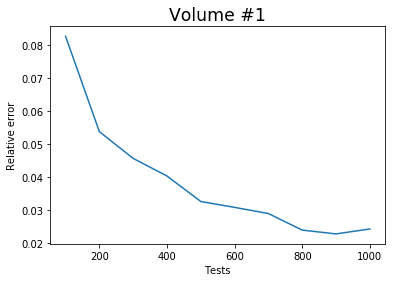

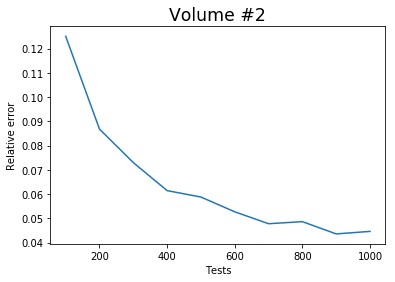

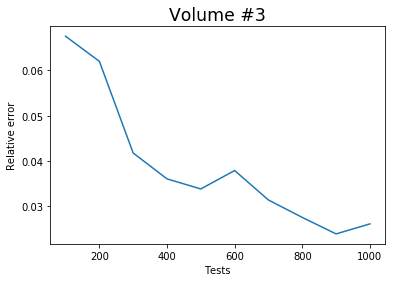

In [19]:
samples = list(range(100, 1100, 100))

for i in range(len(volumes)):
    plt.figure()
    plt.title(f'Volume #{i+1}', size='xx-large')
    plt.ylabel('Relative error')
    plt.xlabel('Tests')
    plt.plot(samples, [
        np.average([
            abs(monte_carlo_volume(*volumes[i], t) - volumes_expected[i])
            for j in range(100)
        ]) / volumes_expected[i]
        for t in samples
    ])